In [1]:
#import beberapa data library dasar yang akan digunakan dalam uji analisis dan prediksi kali ini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
data_cov = pd.read_csv('covid_19_indonesia_time_series_all.csv')
data_cov.head(10)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.0,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,6000.00%,NaN,NaN
7,3/3/2020,ID-RI,Riau,0,0,0,0,1,0,1,...,0.511648,0.00,0.16,0.00,0.00,0.00,0.00%,100.00%,0.0,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,75,...,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,166.67%,1.0,1.0
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.0,1.0


In [14]:
data_cov.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [15]:
data_cov.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [16]:
con1 = data_cov['Date']
data_cov['Date']=pd.to_datetime(data_cov['Date'])

In [17]:
data_cov

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [18]:
data_cov.set_index('Date', inplace=True)
#check datatype of index
data_cov.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-02', '2020-03-02',
               '2020-03-03', '2020-03-03', '2020-03-03', '2020-03-03',
               '2020-03-04', '2020-03-04',
               ...
               '2022-09-15', '2022-09-15', '2022-09-15', '2022-09-15',
               '2022-09-15', '2022-09-15', '2022-09-15', '2022-09-15',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', name='Date', length=31822, freq=None)

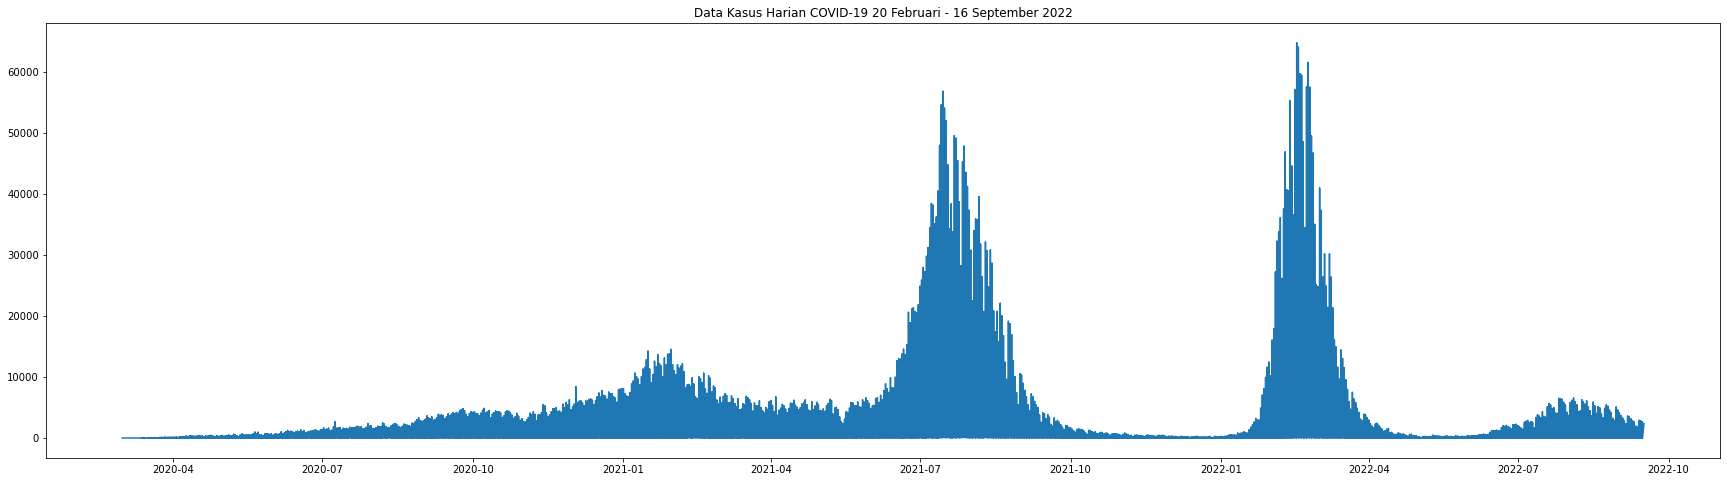

Melihat perkembangan kumulatif total kasus baru setiap harinya

In [20]:
new_cases_cumulatif = np.cumsum(data_cov['New Cases'])

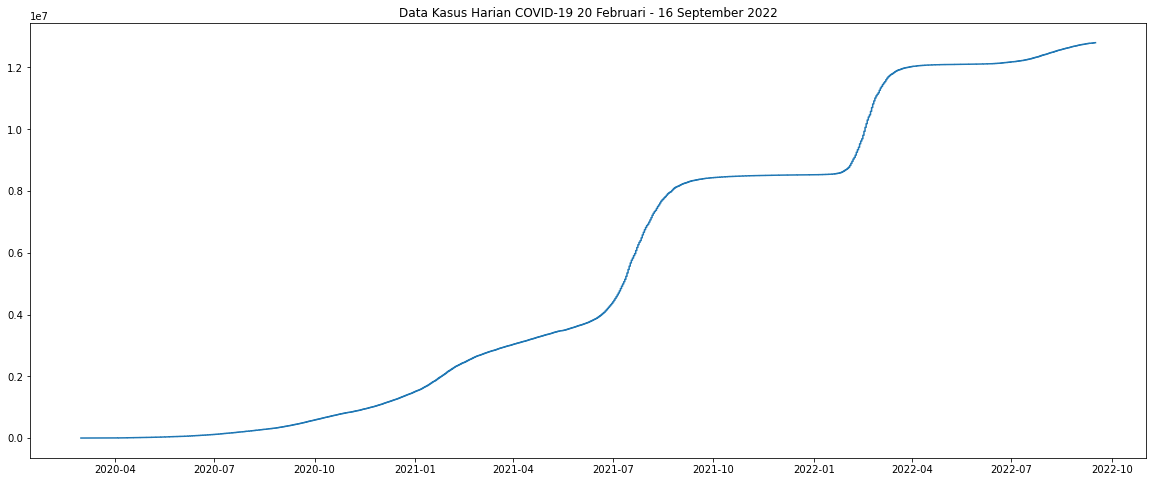

In [21]:
import matplotlib.pyplot as plt
import numpy as np


# Define X and Y variable data
plt.figure(figsize=(20, 8))
plt.plot(new_cases_cumulatif)
plt.title("Data Kasus Harian COVID-19 20 Februari - 16 September 2022") # add title
plt.show()

a. Visualisasi data selama rentang beberapa tahun

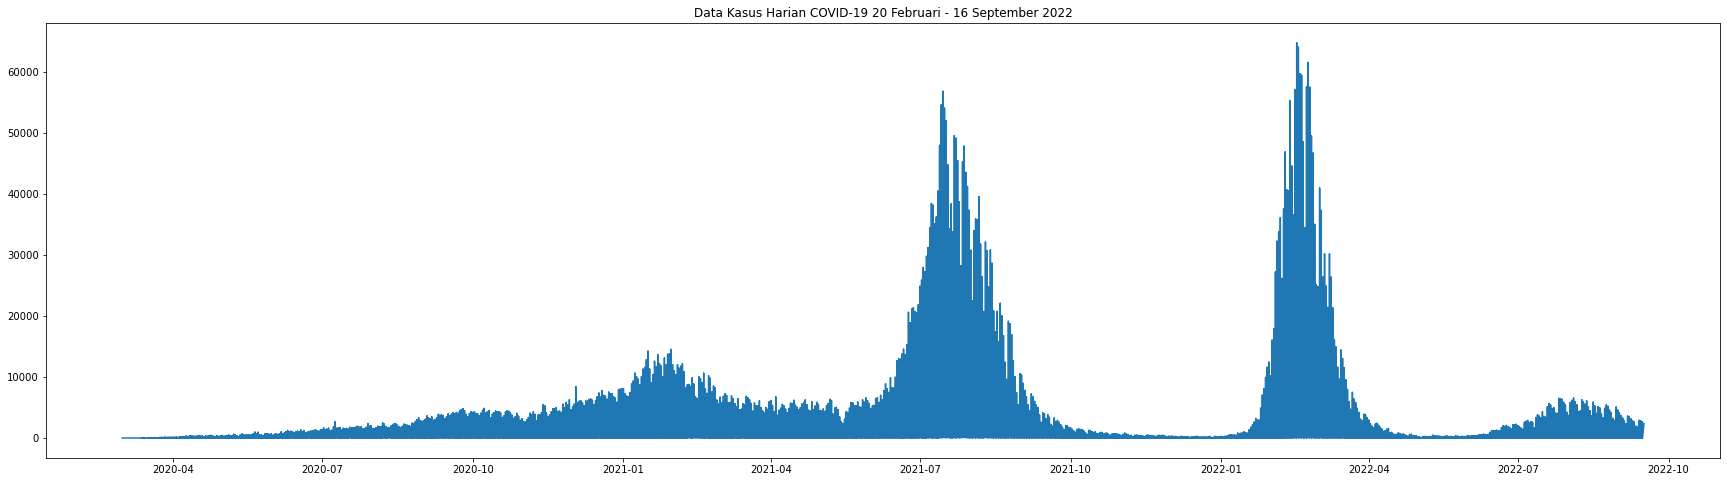

In [41]:
import matplotlib.pyplot as plt
import numpy as np


# Define X and Y variable data
plt.figure(figsize=(30, 8))
plt.plot(data_cov['New Cases'])
plt.title("Data Kasus Harian COVID-19 20 Februari - 16 September 2022") # add title
plt.show()

b. Pengelompokan (grouping) data time series berdasarkan bulan 

In [30]:
tahun_2020 = data_cov.loc['2020-03-01':'2020-12-31']
tahun_2020

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,192.31%,NaN,NaN
2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,182.93%,1.00,1.00
2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,2,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,0,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.00%,100.00%,NaN,NaN
2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,ID-SG,Sulawesi Tenggara,38,2,24,12,7907,147,6680,1080,...,-4.124689,14.42,3000.23,0.76,55.78,5.58,1.86%,84.48%,0.60,1.00
2020-12-31,ID-SA,Sulawesi Utara,87,1,72,14,9670,311,7079,2280,...,1.259638,32.93,3660.27,0.38,117.72,11.77,3.22%,73.21%,2.56,0.25
2020-12-31,ID-SB,Sumatera Barat,117,4,125,-12,23464,525,21816,1123,...,-0.850253,21.20,4251.31,0.72,95.12,9.51,2.24%,92.98%,0.94,4.00


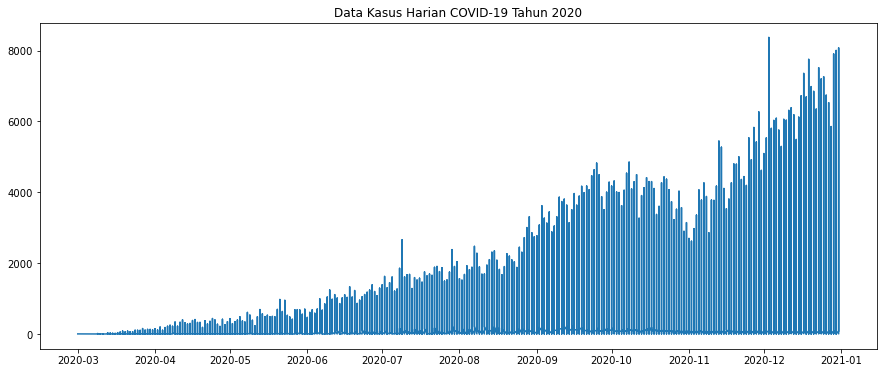

In [46]:
plt.plot(tahun_2020['New Cases'])
plt.title("Data Kasus Harian COVID-19 Tahun 2020") # add title
plt.show()

In [31]:
tahun_2021 = data_cov.loc['2021-01-01':'2021-12-31']
tahun_2021

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,ID-AC,Aceh,7,0,10,-3,8753,358,7150,1245,...,4.225615,1.33,1668.11,0.00,68.23,6.82,4.09%,81.69%,1.75,1.00
2021-01-01,ID-BA,Bali,101,1,76,24,17694,517,16223,954,...,-8.369472,23.96,4196.70,0.24,122.62,12.26,2.92%,91.69%,0.56,0.25
2021-01-01,ID-BT,Banten,287,12,188,87,18441,537,15881,2023,...,-6.456736,26.77,1719.86,1.12,50.08,5.01,2.91%,86.12%,1.06,6.00
2021-01-01,ID-BE,Bengkulu,68,5,97,-34,3671,117,2652,902,...,-3.533584,34.01,1835.92,2.50,58.51,5.85,3.19%,72.24%,0.94,2.50
2021-01-01,ID-JK,DKI Jakarta,1956,20,1643,293,185690,3290,166383,16017,...,-6.204699,180.34,17120.37,1.84,303.33,30.33,1.77%,89.60%,0.97,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,ID-SG,Sulawesi Tenggara,1,0,0,1,20173,528,19638,7,...,-4.124689,0.38,7654.45,0.00,200.34,20.03,2.62%,97.35%,NaN,1.00
2021-12-31,ID-SA,Sulawesi Utara,2,0,2,0,34799,1063,33633,103,...,1.259638,0.76,13172.04,0.00,402.36,40.24,3.05%,96.65%,0.67,1.00
2021-12-31,ID-SB,Sumatera Barat,1,0,11,-10,89873,2153,87704,16,...,-0.850253,0.18,16283.57,0.00,390.09,39.01,2.40%,97.59%,0.50,0.00


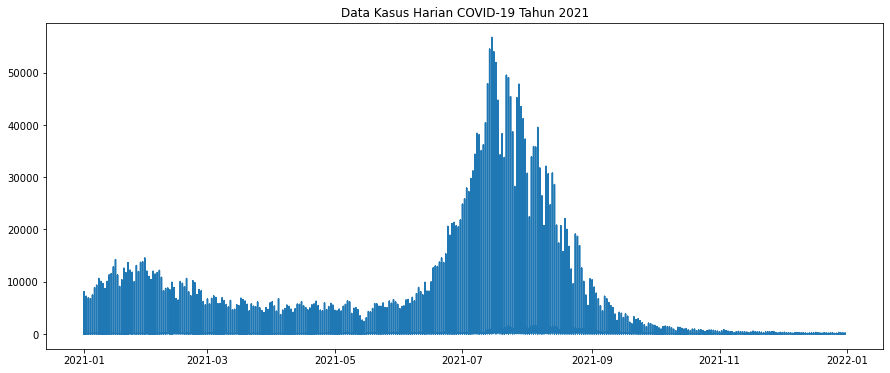

In [50]:
plt.plot(tahun_2021['New Cases'])
plt.title("Data Kasus Harian COVID-19 Tahun 2021") # add title
plt.show()

In [40]:
tahun_2022 = data_cov.loc['2022-01-01':'2022-09-16']
tahun_2022

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,ID-AC,Aceh,0,0,0,0,38430,2066,36362,2,...,4.225615,0.00,7323.83,0.0,393.73,39.37,5.38%,94.62%,0.00,1.00
2022-01-01,ID-BA,Bali,3,0,0,3,114392,4061,110273,58,...,-8.369472,0.71,27131.73,0.0,963.20,96.32,3.55%,96.40%,1.00,0.00
2022-01-01,ID-BT,Banten,8,0,5,3,132834,2694,130133,7,...,-6.456736,0.75,12388.49,0.0,251.25,25.13,2.03%,97.97%,2.00,1.00
2022-01-01,ID-BE,Bengkulu,0,0,0,0,23105,473,22631,1,...,-3.533584,0.00,11555.16,0.0,236.55,23.66,2.05%,97.95%,1.00,1.00
2022-01-01,ID-JK,DKI Jakarta,118,0,46,72,865415,13609,851282,524,...,-6.204699,10.88,79790.10,0.0,1254.73,125.47,1.57%,98.37%,1.36,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,203,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00


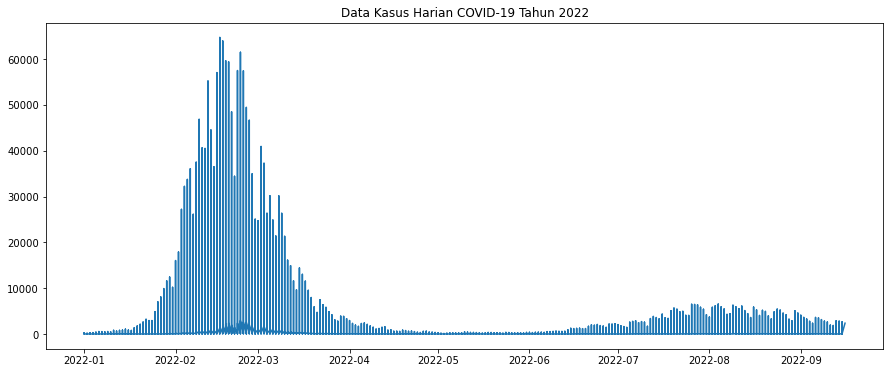

In [51]:
plt.plot(tahun_2022['New Cases'])
plt.title("Data Kasus Harian COVID-19 Tahun 2022") # add title
plt.show()

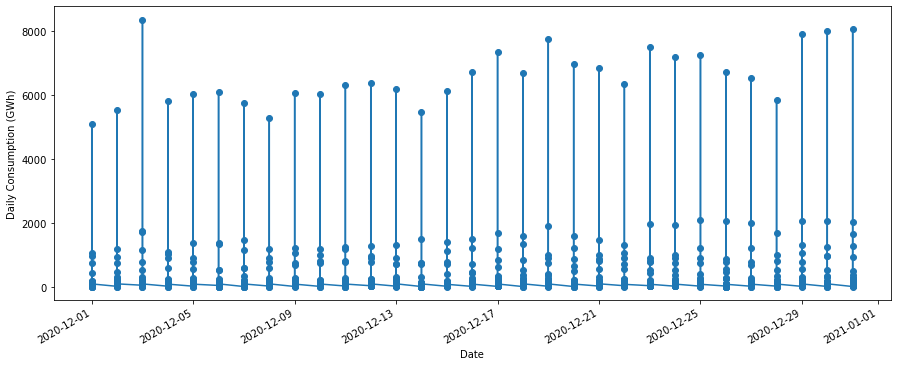

In [63]:
ax = data_cov.loc['2020-12', 'New Cases'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

c. Pengelompokan (grouping) data time series berdasarkan hari 

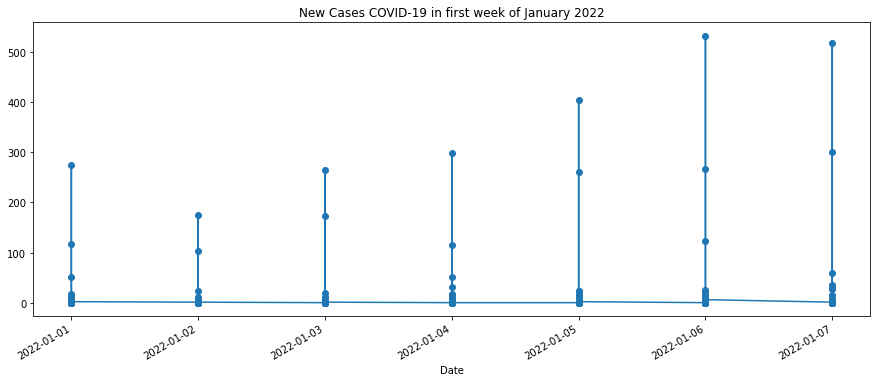

In [62]:
ax = data_cov.loc['2022-01-01':'2022-01-07', 'New Cases'].plot(marker='o', linestyle='-')
ax.set_title('New Cases COVID-19 in first week of January 2022');

d. Visualisasi bersama rata-rata mingguan kasus COVID-19 dan harian 

In [64]:
columns = ['New Cases', 'New Deaths', 'New Recovered']

power_weekly_mean = data_cov[columns].resample('W').mean()
power_weekly_mean.head(10)

,New Cases,New Deaths,New Recovered
Date,,,
2020-03-01,2.000000,0.000000,0.000000
2020-03-08,0.645161,0.161290,0.129032
2020-03-15,2.672727,0.309091,0.854545
2020-03-22,5.680851,0.829787,0.617021
2020-03-29,8.212121,0.975758,0.775758
2020-04-05,8.611354,0.982533,1.764192
2020-04-12,16.827731,1.819328,2.344538
2020-04-19,19.138776,1.400000,2.848980
2020-04-26,18.734694,1.224490,3.706122


In [67]:
start, end = '2022-03', '2022-09'

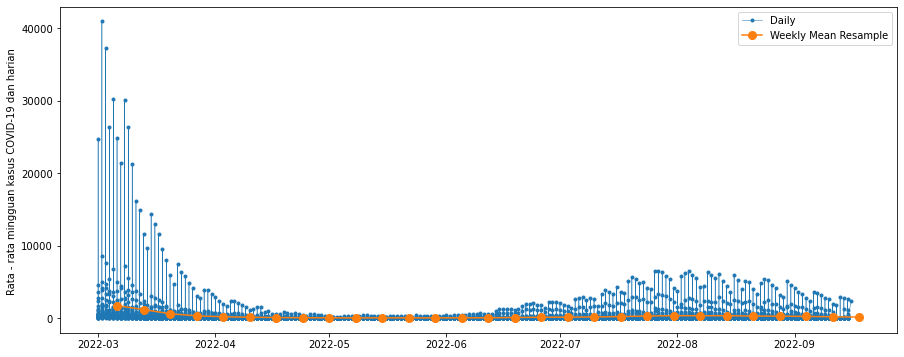

In [187]:
fig, ax = plt.subplots()

ax.plot(data_cov.loc[start:end, 'New Cases'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'New Cases'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Rata - rata mingguan kasus COVID-19 dan harian ')
ax.legend();

2. Uji Hipotesis dengan T-Test

Uji Hipotesis
* H0 : Rata-rata dari kasus harian COVID-19
* H1 : Lebih dari (>) rata-rata dari kasus harian COVID-19

In [157]:
from scipy.stats import ttest_1samp
import numpy as np


average = np.mean(data_cov["New Cases"])
print("Average height is = {0:.3f}".format(average))

tset,pval = ttest_1samp(data_cov["New Cases"], 402)

print("P-value = {}".format(pval))

if pval < 0.05:
    print("We are rejecting the null Hypotheis.")
else:
    print("We are accepting the null hypothesis")

Average height is = 402.311
P-value = 0.9809034287047311
We are accepting the null hypothesis


Artinya data tersebut termasuk rata - rata semua

3. Analisiis Korelasi

![](rumus-analisis-korelasi.png "rumus")

In [104]:
#untuk menghitung Pearson Coefficient Corelation Perlu dibuat sebuah function
def pearsoncc(x,y):
    sigma_x = sum(x)
    sigma_y = sum(y)
    sigma_x_y = sum(x*y)
    atas = (len(x)*sigma_x_y)-(sigma_x*sigma_y)
    bawah = (np.sqrt(len(x)*(sum(x**2))-(sigma_x)**2))*(np.sqrt(len(x)*(sum(y**2))-(sigma_y)**2))
    rumus = atas/bawah
    return rumus

In [105]:
pearsoncc(data_cov['New Cases'],data_cov['New Recovered'])

0.8569394451029546

In [106]:
#mencoba validasi untuk melihat apakah scratch yang kita buat sudah benar atau salah
import pandas as pd
from scipy.stats import pearsonr

list1 = data_cov['New Cases']
list2 = data_cov['New Recovered']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.857


In [107]:
correlation = data_cov.corr(method='pearson')
correlation

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.715800,0.856939,0.319436,0.450040,0.437586,0.415930,0.923300,NaN,0.484002,...,0.090140,-0.033361,-0.015355,0.286930,0.070781,0.156476,0.056529,0.056529,-0.011979,0.016732
New Deaths,0.715800,1.000000,0.782872,-0.102710,0.330987,0.346205,0.299173,0.804404,NaN,0.436884,...,0.026040,-0.025241,-0.016520,0.142762,0.007347,0.260430,0.028235,0.028235,-0.014855,0.050342
New Recovered,0.856939,0.782872,1.000000,-0.214391,0.505747,0.487197,0.472292,0.938581,NaN,0.495591,...,0.093492,-0.034191,-0.015482,0.236727,0.089425,0.180736,0.073467,0.073467,-0.018184,0.030498
New Active Cases,0.319436,-0.102710,-0.214391,1.000000,-0.073337,-0.064373,-0.076223,0.021550,NaN,0.004042,...,0.001508,-0.000477,-0.000423,0.111464,-0.027011,-0.041967,-0.026442,-0.026442,0.010776,-0.025819
Total Cases,0.450040,0.330987,0.505747,-0.073337,1.000000,0.971399,0.999104,0.488342,NaN,0.711372,...,0.127365,-0.046796,-0.018845,0.061034,0.226990,0.016171,0.214913,0.214912,-0.021621,0.010321
Total Deaths,0.437586,0.346205,0.487197,-0.064373,0.971399,1.000000,0.968944,0.472512,NaN,0.727608,...,0.048907,-0.041491,-0.028510,0.027210,0.146406,0.017769,0.213480,0.213480,-0.022898,0.011221
Total Recovered,0.415930,0.299173,0.472292,-0.076223,0.999104,0.968944,1.000000,0.451488,NaN,0.699624,...,0.130019,-0.046710,-0.018464,0.053041,0.232100,0.008824,0.217775,0.217774,-0.021120,0.009583
Total Active Cases,0.923300,0.804404,0.938581,0.021550,0.488342,0.472512,0.451488,1.000000,NaN,0.556699,...,0.050788,-0.026217,-0.010467,0.215448,0.045860,0.159721,0.038254,0.038254,-0.019398,0.019433
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.484002,0.436884,0.495591,0.004042,0.711372,0.727608,0.699624,0.556699,NaN,1.000000,...,-0.063801,0.012441,0.071783,-0.022970,-0.043960,-0.008934,-0.018385,-0.018385,-0.019580,0.013303


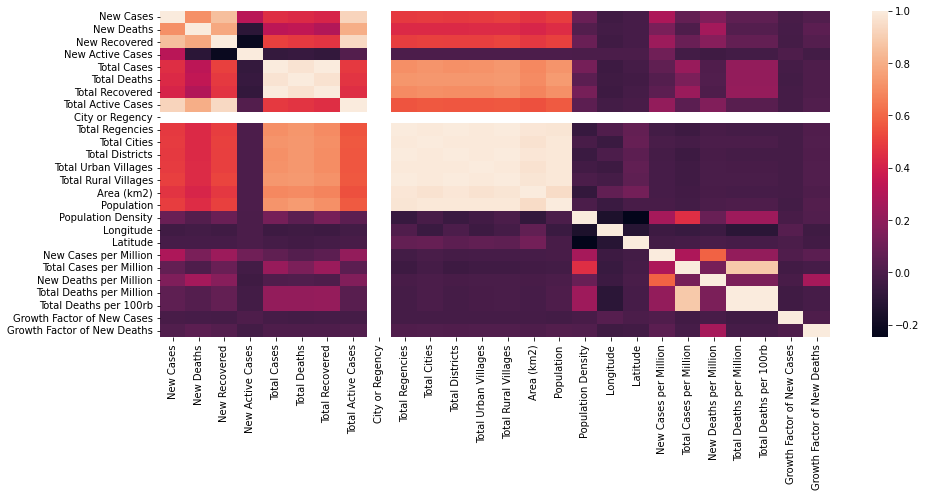

In [14]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

Regresi

Mengambil nilai x dan y dari hasil heatmap manakah yang sekiranya memiliki korelasi tinggi antar 2 variabel data

Saya memilih x nya adalah `data_cov['New Cases']` dan y nya adalah `data_cov['Total Active Cases']`

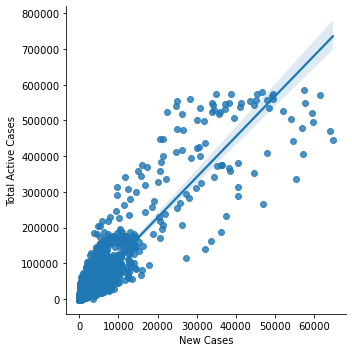

In [110]:
sns.lmplot(x = 'New Cases', y = 'Total Active Cases', data = data_cov)

In [111]:
# Preparing the data
X = data_cov[['New Cases']]
y = data_cov[['Total Active Cases']]

In [112]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [113]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression()

In [114]:
#check prediction score
regressor.score(X_test, y_test)

0.8582900758691019

In [147]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,1191,4418.360956
1,35097,3722.255333
2,835,1181.469810
3,9195,8072.915476
4,7004,7156.376406
5,20,1019.045164
6,1220,2190.822963
7,672,1633.938465
8,189,995.841644
9,4018,4975.245454


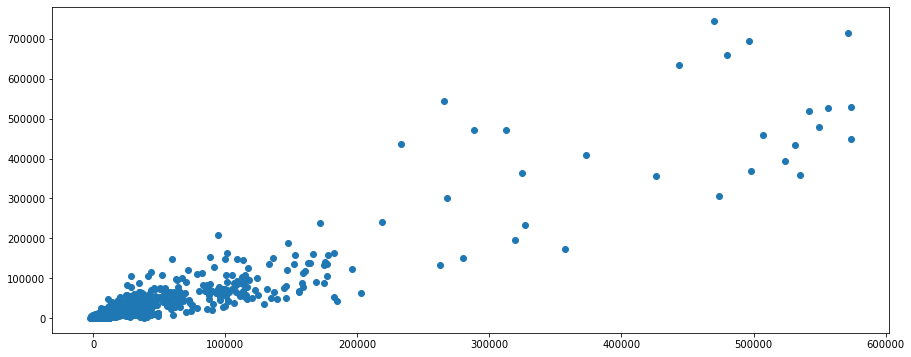

In [116]:
prediction = regressor.predict(X_test)
plt.scatter(y_test, prediction)

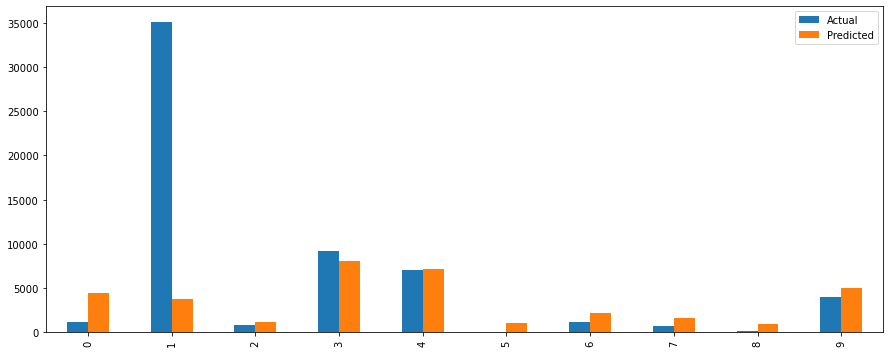

In [117]:
evaluate.head(10).plot(kind = 'bar')

In [141]:
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")

# Mean Absolute Error (MAE)
print(f"MSE score: {mean_absolute_error(y_test, y_pred)}")

# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.8582900758691019
MSE score: 2712.2426413268904
MSE score: 114562932.7277748


Menguji data dengan Model Linear Regresion secara manual dengan menerapkan Fungsi Python Scratch

In [214]:
# Read Data
x = data_cov[['New Cases']].values
y = data_cov[['Total Active Cases']].values

# mean
def get_mean(arr):
    return np.sum(arr)/len(arr)

# variance
def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

# covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

# find coeff
def get_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean*m
    return m, c

# Regression Function
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, c = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + c
        prediction.append(y)
    
    r2 = r2_score(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction

# There are 100 sample out of which 80 are for training and 20 are for testing
linear_regression(x[:80], y[:80], x[80:], y[80:])

The R2 score of the model is:  0.42621172974137644
The MSE score of the model is:  468400530.1573108


[array([-10.07737858]),
 array([35.8958347]),
 array([-38.36858675]),
 array([-34.83218573]),
 array([-31.29578471]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-34.83218573]),
 array([-31.29578471]),
 array([-34.83218573]),
 array([21.75023061]),
 array([-38.36858675]),
 array([-34.83218573]),
 array([-34.83218573]),
 array([-38.36858675]),
 array([-31.29578471]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-31.29578471]),
 array([-38.36858675]),
 array([96.01465206]),
 array([0.53182448]),
 array([-34.83218573]),
 array([-34.83218573]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-34.83218573]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-34.83218573]),
 array([-38.36858675]),
 array([156.13346942]),
 array([-24.22298266]),
 array([-27.75938369]),
 array([-13.6137796]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-38.36858675]),
 array([-34.83218573]),
 array([-38.36858675]),

In [207]:
x = data_cov[['New Cases']].values
y = data_cov[['Total Active Cases']].values
 
#Creating the class object
regressors = LinearRegressions(x,y)
 
#Training the model with .fit method
regressors.fit(1000 , 0.0001) # epochs-1000 , learning_rate - 0.0001
 
#Prediciting the values
y_pred = regressors.predict(x)

<ipython-input-206-391f732edf30>:16: RuntimeWarning: overflow encountered in multiply
  D_m = (-2/self.n)*sum(x* (y - y_pred))
<ipython-input-206-391f732edf30>:16: RuntimeWarning: overflow encountered in add
  D_m = (-2/self.n)*sum(x* (y - y_pred))
<ipython-input-206-391f732edf30>:13: RuntimeWarning: invalid value encountered in multiply
  y_pred = self.m * self.data + self.b


In [196]:
n

31822

Evaluasi model regresi menggunakan MAPE
Implementasikan model regresi dan evaluasi menggunakan 
Python secara scratch

![](rumus-mape.jpg "Rumus")

In [150]:
import numpy as np

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_pred)) * 100

In [153]:
print("Hasil MAPE nya adalah :",round(mape(y_test, y_pred),2),"%")

Hasil MAPE nya adalah : 72.52 %
